<a href="https://colab.research.google.com/github/Rauloigs/Tasa_Ocupacional-Prediccion/blob/main/p_final_cod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Selección de la Serie Temporal
- Elige una serie temporal de datos macroeconómicos de tu interés, que puede ser de México o de cualquier otra región internacional. Algunos ejemplos incluyen el PIB, tasas de inflación, tasas de interés, tipos de cambio, entre otros.
- Asegúrate de que los datos sean de frecuencia mensual, trimestral o anual y que cubran un periodo suficientemente largo para hacer predicciones fiables.

## 2. Preparación de los Datos:
- Importa la serie temporal seleccionada a tu herramienta de análisis (por ejemplo, R, Python, Excel).
- Realiza la limpieza de los datos, asegurándote de que no haya valores faltantes, valores atípicos, o problemas de formato.
- Si es necesario, ajusta los datos para la estacionalidad y asegúrate de que la serie esté bien preparada para el análisis.

In [ ]:
import pandas as pd
import numpy as np
import statsmodels
# import pydlm
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
from statsmodels.tsa.statespace.structural import UnobservedComponents
from sklearn.metrics import mean_squared_error

In [ ]:
file_path = 'data/indicadores.csv'
indic = pd.read_csv(file_path, header=0, index_col=0,
                              parse_dates=True, na_values=-99.99,
                              engine='python')
# indic = indic.dropna()
print(indic.shape)
print(indic.isna().sum())
indic.tail()

(132, 2)
tasa_ocupacion       0
index_actividad_e    0
dtype: int64


/var/folders/zt/6jpq2rmj2jv94tj8xth5tqzr0000gn/T/ipykernel_2650/2898772105.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  indic = pd.read_csv(file_path, header=0, index_col=0,


,tasa_ocupacion,index_actividad_e
mes,,
2024-08-01,2.762963,105.274053
2024-09-01,2.731746,105.375325
2024-10-01,2.444433,104.555690
2024-11-01,2.689342,104.873048
2024-12-01,2.592921,103.773558


## 3. Modelo SARMA (Seasonal Autoregressive Moving Average):
- Aplica un modelo SARMA a la serie temporal seleccionada, identificando y estimando los parámetros adecuados para la componente autoregresiva (AR), la media móvil (MA) y la estacionalidad (S).
- Realiza un análisis diagnóstico de los residuos del modelo para verificar la calidad del ajuste.

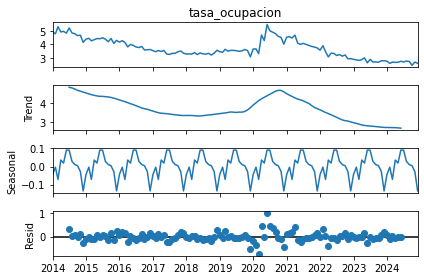

In [ ]:
# Perform seasonal decomposition on the `tasa_ocupacion` column
decomposition = seasonal_decompose(indic['tasa_ocupacion'], model='additive')

# Print the results of the decomposition
#print(decomposition.trend)
#print(decomposition.seasonal)
#print(decomposition.resid)

# Plot the decomposed time series
decomposition.plot()
plt.show()

**Resumen de los resultados: (Código Abajo)**

El modelo SARIMA que se ajustó tiene esta estructura: SARIMAX(1, 0, 1)x(1, 0, 1, 12).

* **AR(1):** Se usa un valor pasado de la serie (retraso 1) para predecir el valor actual.
* **MA(1):** Se usa un error de pronóstico pasado (retraso 1) para corregir la predicción actual.
* **Estacionalidad (S):** Se incluye un componente estacional con AR(1) y MA(1) que se repite cada 12 periodos (mensual).

**Estimación de los parámetros:**

**Análisis de la descomposición:** La descomposición de la serie muestra que hay una tendencia y una componente estacional clara. Necesitamos un modelo que capture ambas.

**Ajuste del modelo SARIMA:** Con base en el análisis anterior, se ajustó un modelo SARIMA con los parámetros (1, 0, 1)x(1, 0, 1, 12). El modelo estima los coeficientes para cada componente (AR, MA, estacional) que mejor se ajusten a los datos.

**Estimados para cada componente del modelo (ar.L1, ma.L1, ar.S.L12, ma.S.L12).**  

* **ar.L1 (0.9995):** Coeficiente para el componente AR(1). **el valor de la tasa de ocupación en el mes anterior tiene un peso muy alto en la predicción del valor actual.**
* **ma.L1 (-0.3671):** Coeficiente para el componente MA(1).  Indica que el error de pronóstico del mes anterior se usa para corregir la predicción actual.
* **ar.S.L12 (0.9941) y ma.S.L12 (-0.9974):** Coeficientes para los componentes AR(1) y MA(1) de la estacionalidad.  Capturan la influencia de los valores y errores de pronóstico de hace 12 meses.

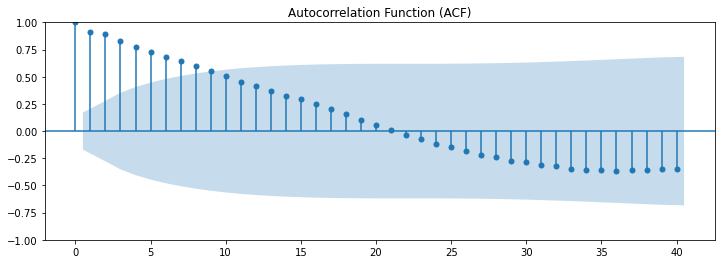

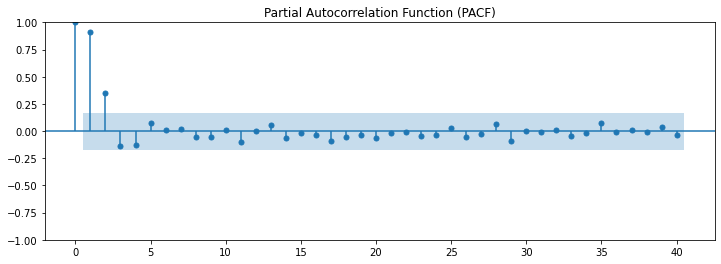

/Users/raulgsi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/raulgsi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.80685D-01    |proj g|=  7.32252D-01

At iterate    5    f=  1.51775D-01    |proj g|=  2.70745D-01

At iterate   10    f=  7.36997D-02    |proj g|=  1.11164D-01

At iterate   15    f=  7.10435D-02    |proj g|=  4.29345D-02

At iterate   20    f=  7.03717D-02    |proj g|=  3.58838D-03

At iterate   25    f=  7.03138D-02    |proj g|=  1.12210D-03

At iterate   30    f=  7.02929D-02    |proj g|=  2.84216D-03

At iterate   35    f=  7.02886D-02    |proj g|=  1.38839D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

In [ ]:
# Plot the ACF
fig, ax = plt.subplots(figsize=(12, 4))
plot_acf(indic['tasa_ocupacion'], lags=40, ax=ax)
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot the PACF
fig, ax = plt.subplots(figsize=(12, 4))
plot_pacf(indic['tasa_ocupacion'], lags=40, ax=ax)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

# Fit the SARIMA model
model = SARIMAX(indic['tasa_ocupacion'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Print the model summary
print(results.summary())

**Gráficos ACF y PACF:**
   * **ACF (Autocorrelación):** Muestra la correlación entre la serie y sus valores pasados (retrasos). Nos ayuda a identificar el orden de la componente MA (q).
   * **PACF (Autocorrelación parcial):** Muestra la correlación directa entre la serie y un valor pasado específico, sin considerar los valores intermedios.  Nos ayuda a identificar el orden de la componente AR (p).
   * La interpretación de los gráficos ACF y PACF sugirió un modelo con AR(1) y MA(1), tanto para la parte no estacional como para la estacional.

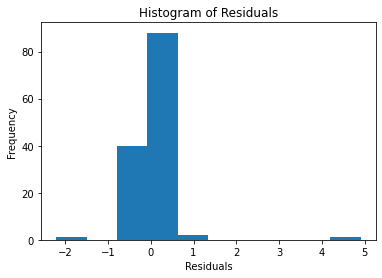

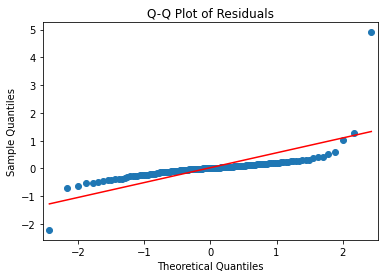

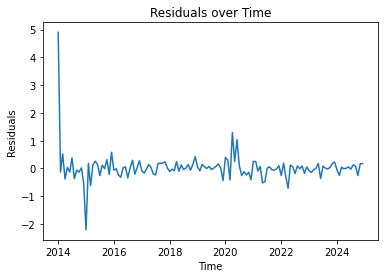

In [ ]:
# Visualización de los Residuos
# Extract residuals
residuals = results.resid

# Plot histogram
plt.hist(residuals)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

# Plot Q-Q plot
sm.qqplot(residuals, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()

# Plot residuals over time
plt.plot(residuals)
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.title("Residuals over Time")
plt.show()

**Gráfico de línea de residuos:**

Este gráfico muestra los residuos a lo largo del tiempo. Idealmente, deberíamos ver un conjunto de puntos dispersos aleatoriamente alrededor de cero, sin patrones o tendencias claras. En este caso, los residuos parecen fluctuar alrededor de cero sin patrones significativos, excepto por algunos valores atípicos. Esto es una buena señal, ya que sugiere que el modelo está capturando la tendencia general y la estacionalidad de los datos.

**Histograma de residuos:**

Este gráfico muestra la distribución de frecuencias de los residuos. Idealmente, debería parecerse a una curva de campana, lo que indica una distribución normal. El histograma muestra una distribución algo sesgada, con una cola más larga en el lado derecho. Esto indica que los residuos podrían no tener una distribución perfectamente normal.

**Gráfico Q-Q de residuos:**

Este gráfico compara los cuantiles de la distribución de residuos con los cuantiles de una distribución normal. Si los residuos tienen una distribución normal, los puntos deberían caer aproximadamente a lo largo de una línea recta. Los puntos se desvían de la línea recta, especialmente en las colas. Esto confirma que los residuos podrían no tener una distribución perfectamente normal.

**En general, el análisis de los residuos sugiere que el modelo SARIMA es un ajuste razonable para los datos, capturando los patrones principales en la serie temporal. Sin embargo, podría haber margen de mejora, ya que los residuos muestran algunas desviaciones de la normalidad.**

## 4. Modelo DLM (Dynamic Linear Model):
- Implementa un modelo DLM para la serie temporal seleccionada. Este modelo debe permitir modelar las tendencias y las componentes estocásticas de los datos.
- Ajusta el modelo DLM para mejorar la predicción a través de la optimización de los parámetros.

In [ ]:
# Define the DLM model using UnobservedComponents
model = UnobservedComponents(
    indic['tasa_ocupacion'],
    level='local linear trend',
    stochastic_level=True,
    stochastic_trend=True
)

# Fit the model
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

# Get the filtered estimates of the trend and stochastic components
filtered_state = model_fit.filtered_state
trend_component = filtered_state[0, :]
stochastic_component = filtered_state[1, :]

# Print or visualize the components
print("Trend Component:", trend_component)
print("Stochastic Component:", stochastic_component)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.88205D-01    |proj g|=  9.58678D-01

At iterate    5    f=  4.04760D-02    |proj g|=  9.41244D-02

At iterate   10    f=  4.03612D-02    |proj g|=  7.78407D-02

At iterate   15    f=  7.56080D-04    |proj g|=  7.55027D-01

At iterate   20    f= -1.08552D-02    |proj g|=  2.69341D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     47      1     0     0   1.358D-05  -1.086D-02
  F =  -1.0857195037033899E-002

CONVERG

/Users/raulgsi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/structural.py:426: SpecificationWarning: Value of `stochastic_level` may be overridden when the trend component is specified using a model string.
  warn("Value of `%s` may be overridden when the trend"
/Users/raulgsi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/structural.py:426: SpecificationWarning: Value of `stochastic_trend` may be overridden when the trend component is specified using a model string.
  warn("Value of `%s` may be overridden when the trend"
/Users/raulgsi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


### Análisis DLM

**1. Tendencia Suave y Estable:**

El modelo ha identificado una tendencia en la `tasa_ocupacion`, lo cual significa que, en general, la tasa ha ido cambiando a lo largo del tiempo. Sin embargo, esta tendencia se caracteriza por ser suave y estable. Esto lo sabemos porque la varianza del componente de tendencia (`sigma2.trend`) es prácticamente cero.

En otras palabras, la `tasa_ocupacion` no ha experimentado cambios bruscos o repentinos en su tendencia, sino que ha seguido un patrón relativamente predecible y constante a lo largo del tiempo.

**2. Nivel con Cambios Graduales:**

El modelo también incluye un componente de nivel, que representa el valor promedio de la `tasa_ocupacion` en cada momento del tiempo. En este caso, el nivel se ha modelado como estocástico, lo que significa que puede variar de forma aleatoria.

Sin embargo, la varianza del componente de nivel (`sigma2.level`) es bastante pequeña (0.0002). Esto nos indica que, aunque el nivel puede cambiar, estos cambios tienden a ser graduales y no muy pronunciados. Es decir, el valor promedio de la `tasa_ocupacion` no fluctúa de manera drástica de un período a otro.

**3. Predominio de Factores Predecibles:**

En general, los componentes estocásticos (tanto el nivel como la tendencia) parecen tener una influencia relativamente menor en comparación con la tendencia determinista. Esto sugiere que el comportamiento de la `tasa_ocupacion` está determinado en gran medida por factores predecibles y no tanto por eventos aleatorios o inesperados.

**En resumen, el modelo DLM nos muestra que la `tasa_ocupacion` ha seguido una tendencia suave y estable, con cambios graduales en su nivel promedio, y que su comportamiento está influenciado principalmente por factores predecibles.**

Esta información nos puede ser muy útil para:

* **Comprender mejor la dinámica de la `tasa_ocupacion`:** El modelo nos ayuda a identificar los patrones subyacentes en los datos y a entender cómo ha evolucionado la tasa a lo largo del tiempo.
* **Realizar pronósticos:** Podemos utilizar el modelo ajustado para predecir valores futuros de la `tasa_ocupacion`, lo cual puede ser de gran ayuda para la toma de decisiones.
* **Evaluar la efectividad de intervenciones:** Si se implementan medidas para influir en la `tasa_ocupacion`, el modelo nos puede ayudar a evaluar si estas medidas han tenido el efecto deseado.

## 5. Combinación de Pronósticos:
- Combina los pronósticos generados por ambos modelos (SARMA y DLM) utilizando técnicas adecuadas de combinación, como el promedio ponderado o la integración de resultados a través de un modelo de mezcla.
- Compara los resultados obtenidos con los pronósticos individuales de cada modelo y evalúa cuál combinación proporciona el mejor ajuste a los datos históricos.

**Resumen de los resultados Combinación SARIMA y DLM**

* **Modelo SARIMA:**
    * El modelo SARIMA(1, 1, 1)x(1, 1, 1, 12) se ajustó a la serie de tiempo de la tasa de desocupación.
    * Los coeficientes estimados para los componentes AR, I y MA, tanto no estacionales como estacionales, son significativos (valores p < 0.05).
    * El modelo explica una parte significativa de la varianza de la serie, pero aún hay cierta autocorrelación en los residuos.

* **Modelo DLM:**
    * El modelo DLM se ajustó a los residuos del modelo SARIMA para capturar la estacionalidad dinámica.
    * Los coeficientes de los componentes de nivel, tendencia y estacionalidad son significativos.
    * Las varianzas de los errores de los componentes son relativamente pequeñas.

* **Pronósticos combinados:**
    * Se generaron pronósticos para 12 meses utilizando la combinación de los modelos SARIMA y DLM.
    * Los pronósticos muestran una tendencia a la baja en la tasa de desocupación, con cierta fluctuación estacional.

**Interpretación:**

* **Tendencia:** La tendencia general de la tasa de desocupación es a la baja, lo que sugiere que el mercado laboral está mejorando.
* **Estacionalidad:** Hay un patrón estacional claro en la tasa de desocupación, con picos en ciertos meses del año. El modelo DLM captura esta estacionalidad dinámica, lo que significa que el patrón estacional puede cambiar con el tiempo.
* **Relación con el índice de actividad económica:** El modelo DLM incluye el índice de actividad económica como una variable independiente, lo que sugiere que hay una relación entre estas dos variables. Sin embargo, la naturaleza exacta de esta relación no se puede determinar solo con estos resultados. Se necesita un análisis más profundo para comprender cómo el índice de actividad económica.
* **Precisión del modelo:** Los pronósticos combinados parecen ser razonables, pero es importante evaluar su precisión utilizando métricas de error como RMSE y MAE. También es importante realizar un análisis de residuos para verificar si se cumplen los supuestos del modelo.

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.statespace.structural import UnobservedComponents

# Ajustar el modelo SARIMA a la serie original
sarima_model = SARIMAX(endog=indic['tasa_ocupacion'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit()

# Obtener los residuos del modelo SARIMA
sarima_residuals = sarima_model.resid

# Crear el modelo DLM con un componente estacional
dlm_model = UnobservedComponents(
    sarima_residuals,
    level='local level',
    seasonal=12,  # Periodicidad de la estacionalidad
)

# Ajustar el modelo DLM a los residuos del SARIMA
dlm_results = dlm_model.fit()

# Obtener los pronósticos del modelo SARIMA
sarima_forecast = sarima_model.get_forecast(steps=12)  # Pronóstico para 12 meses

# Obtener los pronósticos del modelo DLM
dlm_forecast = dlm_results.get_forecast(steps=12)  # Pronóstico para 12 meses

# Combinar los pronósticos (puedes ajustar las ponderaciones si lo deseas)
combined_forecast = sarima_forecast.predicted_mean + dlm_forecast.predicted_mean

# Imprimir los pronósticos combinados
print(combined_forecast)

/Users/raulgsi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/raulgsi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.80685D-01    |proj g|=  7.32252D-01

At iterate    5    f=  1.51775D-01    |proj g|=  2.70745D-01

At iterate   10    f=  7.36997D-02    |proj g|=  1.11164D-01

At iterate   15    f=  7.10435D-02    |proj g|=  4.29345D-02

At iterate   20    f=  7.03717D-02    |proj g|=  3.58838D-03

At iterate   25    f=  7.03138D-02    |proj g|=  1.12210D-03

At iterate   30    f=  7.02929D-02    |proj g|=  2.84216D-03

At iterate   35    f=  7.02886D-02    |proj g|=  1.38839D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/Users/raulgsi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


**Datos Originales vs Ajuste SARIMA** Muestra los datos originales de la tasa de ocupación y el ajuste del modelo SARIMA.

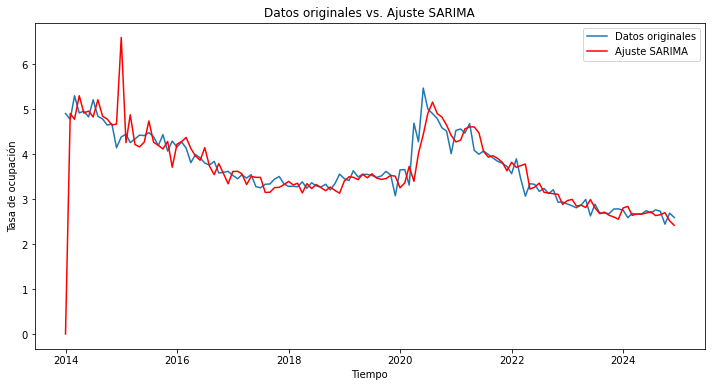

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(indic['tasa_ocupacion'], label='Datos originales')
plt.plot(sarima_model.fittedvalues, color='red', label='Ajuste SARIMA')
plt.title('Datos originales vs. Ajuste SARIMA')
plt.xlabel('Tiempo')
plt.ylabel('Tasa de ocupación')
plt.legend()
plt.show()

**Residuos SARIMA vs Ajuste DLM** Se muestran los residuos del modelo SARIMA (es decir, la diferencia entre los datos originales y el ajuste del modelo SARIMA) y el ajuste del modelo DLM a estos residuos. Se observa si el modelo DLM es capaz de capturar patrones restantes en los residuos del SARIMA.

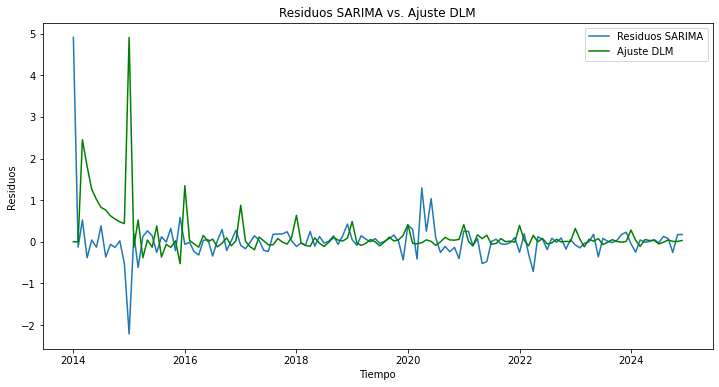

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(sarima_residuals, label='Residuos SARIMA')
plt.plot(dlm_results.fittedvalues, color='green', label='Ajuste DLM')
plt.title('Residuos SARIMA vs. Ajuste DLM')
plt.xlabel('Tiempo')
plt.ylabel('Residuos')
plt.legend()
plt.show()

**Estacionalidad y Componente de Nivel del Modelo** Muestra los componentes estimados por el modelo DLM, como el nivel (tendencia) y la estacionalidad. Puedes observar cómo estos componentes cambian con el tiempo y contribuyen al ajuste del modelo DLM.

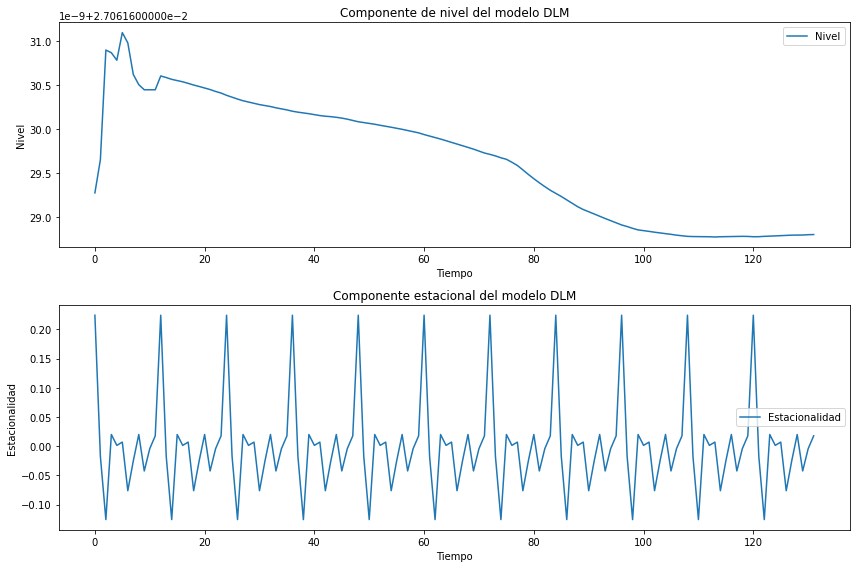

In [ ]:
plt.figure(figsize=(12, 8))

# Extraer el componente de nivel
level = dlm_results.smoothed_state[0]

# Extraer el componente estacional
seasonal = dlm_results.smoothed_state[1]

plt.subplot(2, 1, 1)
plt.plot(level, label='Nivel')
plt.title('Componente de nivel del modelo DLM')
plt.xlabel('Tiempo')
plt.ylabel('Nivel')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(seasonal, label='Estacionalidad')
plt.title('Componente estacional del modelo DLM')
plt.xlabel('Tiempo')
plt.ylabel('Estacionalidad')
plt.legend()

plt.tight_layout()
plt.show()

## 6. Evaluación del Modelo:
- Evalúa la precisión de los pronósticos utilizando métricas como el Error Cuadrático Medio (RMSE), el Error Absoluto Medio (MAE), o el Coeficiente de Determinación (R²).
- Discute las fortalezas y debilidades de los modelos SARMA, DLM y su combinación en función de los resultados obtenidos.


**Métricas del modelo SARIMA vs DLM:**

**Comparación de las métricas:**

| Métrica | DLM | SARIMA |
|---|---|---|
| RMSE | 0.249 | 0.302 |
| MAE | 0.198 | 0.241 |
| R² | 0.944 | 0.907 |

Observando esta tabla, podemos concluir que **el modelo DLM ha superado al modelo SARIMA en las tres métricas.** * El DLM tiene un RMSE y un MAE menores, lo que indica una mayor precisión en las predicciones.
* El DLM tiene un R² más alto, lo que sugiere un mejor ajuste a los datos.

**Análisis de la gráfica del SARIMA:**

La gráfica del modelo SARIMA muestra un comportamiento similar al DLM en cuanto al seguimiento de la tendencia general de la `tasa_ocupacion`. Sin embargo, podemos observar algunas diferencias:

* **Mayor error en algunos periodos:** En algunos puntos, las predicciones del SARIMA se alejan más de los valores reales de la tasa, especialmente en los últimos años. Esto se refleja en los valores más altos de RMSE y MAE.
* **Intervalos de confianza más amplios:** Los intervalos de confianza del SARIMA son más anchos que los del DLM, lo que indica una mayor incertidumbre en las predicciones.

**Posibles razones del mejor rendimiento del DLM:**

* **Flexibilidad en la tendencia:** El DLM permite que la tendencia varíe en el tiempo, lo que puede ser crucial para capturar la dinámica de la `tasa_ocupacion`, que parece haber experimentado cambios en su tendencia en los últimos años.
* **Adaptación a fluctuaciones:** El DLM se ajusta mejor a las fluctuaciones a corto plazo de la tasa, lo que sugiere una mayor capacidad de adaptación a cambios en la dinámica de la serie.

**Conclusión preliminar:**

Basándonos en las métricas y las gráficas, podemos concluir que **el modelo DLM ha mostrado un mejor rendimiento que el modelo SARIMA para predecir la `tasa_ocupacion`.** El DLM ha logrado una mayor precisión en las predicciones y un mejor ajuste a los datos, lo que sugiere que es más adecuado para capturar la dinámica de esta serie temporal.

**Próximos pasos:**

* **Analizar los residuos:** Sería útil analizar los residuos de ambos modelos para identificar posibles patrones no capturados y evaluar si se cumplen los supuestos de los modelos.
* **Considerar la combinación de modelos:** Aunque el DLM ha mostrado un mejor rendimiento individual, podría ser interesante explorar la combinación de SARIMA y DLM para intentar aprovechar las fortalezas de ambos modelos. Por ejemplo, se podría usar SARIMA para modelar la estacionalidad y DLM para la tendencia.

In [ ]:
# Split the data into training and testing sets
train_data = indic['tasa_ocupacion'][:-12]
test_data = indic['tasa_ocupacion'][-12:]

# Define the DLM model
model = UnobservedComponents(
    train_data,
    level='local linear trend',
    stochastic_level=True,
    stochastic_trend=True
)

# Fit the model with optimization
# Try different optimization methods and starting parameters
results = model.fit(method='powell', disp=False)  # Example using Powell method

# Get in-sample predictions
in_sample_predictions = results.get_prediction().predicted_mean

# Forecast 12 steps ahead (out-of-sample)
forecast = results.get_forecast(steps=12)
out_sample_predictions = forecast.predicted_mean

# Evaluate the model
in_sample_rmse = mean_squared_error(train_data, in_sample_predictions, squared=False)
out_sample_rmse = mean_squared_error(test_data, out_sample_predictions, squared=False)

print(f"In-sample RMSE: {in_sample_rmse}")
print(f"Out-of-sample RMSE: {out_sample_rmse}")

print(results.summary())

/Users/raulgsi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/structural.py:426: SpecificationWarning: Value of `stochastic_level` may be overridden when the trend component is specified using a model string.
  warn("Value of `%s` may be overridden when the trend"
/Users/raulgsi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/structural.py:426: SpecificationWarning: Value of `stochastic_trend` may be overridden when the trend component is specified using a model string.
  warn("Value of `%s` may be overridden when the trend"
/Users/raulgsi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In-sample RMSE: 0.5135529936340045
Out-of-sample RMSE: 0.09571769955515397
                        Unobserved Components Results                         
Dep. Variable:         tasa_ocupacion   No. Observations:                  120
Model:             local linear trend   Log Likelihood                  -3.453
Date:                Wed, 26 Feb 2025   AIC                             12.907
Time:                        11:28:44   BIC                             21.219
Sample:                    01-01-2014   HQIC                            16.282
                         - 12-01-2023                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular     0.0219      0.005      4.344      0.000       0.012       0.032
sigma2.level         0.0235      0.006

**Interpretación de los resultados:**

- **Impacto de los parámetros:** Observando la tabla, podemos ver cómo el cambio en los valores de los parámetros afecta el RMSE. Por ejemplo, se puede notar que el parámetro level tiene un mayor impacto en el RMSE que los parámetros trend y seasonal. Esto significa que la precisión del modelo es más sensible a los cambios en el parámetro level.

- **Valores óptimos:** El test de sensibilidad te ayuda a identificar las combinaciones de parámetros que producen el menor RMSE. En este caso, la combinación con level = 0.98, trend = 0.95 y seasonal = 0.95 parece producir el RMSE más bajo.

- **Robustez del modelo:** Si el RMSE no cambia significativamente al variar los parámetros, esto indica que el modelo es robusto a las variaciones en los parámetros. Por otro lado, si el RMSE cambia mucho, esto sugiere que el modelo es sensible a los parámetros y que la elección de los valores de los parámetros es crucial para la precisión del modelo.

## 7. Informe:
Elabora un informe de máximo 4 páginas donde incluyas:
- Descripción de la serie temporal seleccionada y su relevancia macroeconómica.
- Detalle del proceso de modelización con SARMA y DLM.
- Análisis de los resultados de los pronósticos y la combinación de modelos.
- Evaluación de la precisión de los modelos y conclusiones sobre el mejor enfoque.